## NBA Shot Outcome Simulator - Zhiyuan (Percy) Xu
### Dataset Description
I will use a dataset of current NBA players from the video game NBA2K25. This dataset includes player attributes (e.g., layup rating, dunk rating, 3-point shot, defense, speed, vertical) and in-game badges that represent special abilities. NBA2K25 is known for closely modeling real-world basketball performance, making this dataset a strong candidate for simulating player interactions.
### Project Goal
The goal is to simulate whether a player can make a shot based on three inputs:
* The offensive player's offensive attributes and badge (if they have)
* The defensive player's defensive attributes and bagde (if they have)
* The type of shot (2pt, 3pt, layup, dunk)
### Analyses:
I plan to do some analysis as following: 
1. Load and clean the data.
2. Remove some irrevalant attributes to simplify the calculation. For example, even though highets and weights will affect players' speed, which will further influence their defense or offense, we will not include those data in the dataset. 
3. Count and analyze the badge types
4. Write some user-defined functions to define scoring formulas for each shot type. 
5. Include the badge to the calculation. 
6. Test examples by requiring inputs (offensive player, defensive player, type of shot). 
7. Create some graphs on offensive players and defensive players by categories. For example, who can make the 3pt shots infront of at least half of the league?
8. We could even add some interesting analysis to this project: who can perform the best when competing their college rivalries? Among the players who graduated from Duke University, who showed their killer instincts when facing their NCAA rivals, the University of North Carolina alumni?
### Why this project is worth doing
Even though this project isn’t related to my major in Agricultural and Applied Economics, I think it’s a good example of using data to understand and simulate behavior. We do similar things in economics too — like predicting how people make decisions based on different factors. This project will have at least 20 steps of analysis, and the idea is simple and clear enough that it could be used as a fun assignment for undergrads who like sports or video games.

## Project starts here:

In [1]:
# Imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, let's take a look at the original dataset. The dataset contains 526 current players in the NBA league (as for 10/06/2024). It also contains over 100 columns of information of each player. Since we don't use all of them for analysis, we need to drop some columns. 

This project will use information from [nba2klab](https://www.nba2klab.com/nba2k-attributes?utm_source=chatgpt.com).

### Task 1.1: Import `current_nba_players.csv`

In [2]:
# load "current_nba_players.csv" into a pandas dataframe
df = pd.read_csv('current_nba_players.csv')
att = pd.read_csv('NBA_attribution.csv')

### Task 2.1: Clean data

In [3]:
# drop some columns that contains player's bio-information 
df = df.drop(columns=['Unnamed: 0','nationality_2','position_2','archetype', 'height_cm','weight_kg','wingspan_feet','wingspan_cm','birthdate','hometown'])
# drop some columns that contains player's offensive rating 
df = df.drop(columns=['group_outside_scoring','free_throw','offensive_consistency','group_athleticism','speed','agility','strength','vertical','stamina','hustle','overall_durability','group_inside_scoring','standing_dunk','post_hook','post_fade','post_control','draw_foul'])
# drop some columns that contains player's defensive rating
df = df.drop(columns=['group_defense','help_defense_iq','shot_iq', 'defensive_consistency','group_rebounding','offensive_rebound','defensive_rebound','intangibles','potential','total_attributes'])
# drop some columns that contains player's playmaking rating
df = df.drop(columns=['hands','group_playmaking','pass_accuracy','ball_handle','speed_with_ball','pass_iq','pass_vision','pass_perception'])
# drop all the badges
df = df.drop(columns=['badge_deadeye','badge_limitless_range','badge_mini_marksman','badge_set_shot_specialist','badge_shifty_shooter','badge_aerial_wizard','badge_float_game','badge_hook_specialist','badge_layup_mixmaster','badge_paint_prodigy','badge_physical_finisher','badge_post_fade_phenom','badge_post_powerhouse','badge_post_up_poet','badge_posterizer','badge_rise_up','badge_ankle_assassin','badge_bail_out','badge_break_starter','badge_dimer','badge_handles_for_days','badge_lightning_launch','badge_strong_handle','badge_unpluckable','badge_versatile_visionary','badge_challenger','badge_glove','badge_high_flying_denier','badge_immovable_enforcer','badge_interceptor','badge_off_ball_pest','badge_on_ball_menace','badge_paint_patroller','badge_pick_dodger','badge_post_lockdown','badge_boxout_beast','badge_rebound_chaser','badge_brick_wall','badge_slippery_off_ball','badge_pogo_stick'])

### Task 2.2: Rename columns

In [4]:
# rename the columns to make them more readable
df = df.rename(columns={
   'name'              : 'Name',
   'nationality_1'     : 'Nationality',
   'team'              : 'Team',
   'jersey'            : 'Jersey',
   'position_1'        : 'Position',
   'height_feet'       : 'Height_ft',
   'weight_lbs'        : 'Weight_lbs',
   'season_salary'     : 'Salary',
   'years_in_the_nba'  : 'Years_Played',
   'prior_to_nba'      : 'Prior_to_NBA',
   'overall'           : 'Overall',
   'close_shot'        : 'Close_Shot',
   'mid_range_shot'    : '2pt_Shot',
   'three_point_shot'  : '3pt_Shot',
   'layup'             : 'Layup',
   'driving_dunk'      : 'Driving_Dunk',
   'interior_defense'  : 'Interior_Defense',
   'perimeter_defense' : 'Perimeter_Defense',
   'steal'             : 'Steal',
   'block'             : 'Block',
})

### Task 2.3: Remove players who are not actively palying in the league
For whom has 'NaN' in 'Salary' column, we consider this player is not actively playing in the league for this season. 

In [5]:
# drop all the rows that contains NaN values in 'Salary' column
df = df.dropna(subset=['Salary'])

In [6]:
df.head()

,Name,Nationality,Team,Jersey,Position,Height_ft,Weight_lbs,Salary,Years_Played,Prior_to_NBA,Overall,Close_Shot,2pt_Shot,3pt_Shot,Layup,Driving_Dunk,Interior_Defense,Perimeter_Defense,Steal,Block
0,Aaron Gordon,United States,Denver Nuggets,32.0,PF,"6'8""",235,22841455.0,11.0,Arizona,85,84,70,79,86,94,80,86,38,47
1,Aaron Holiday,United States,Houston Rockets,0.0,PG,"6'0""",185,4668000.0,7.0,UCLA,74,95,74,82,70,60,34,68,46,35
2,Aaron Nesmith,United States,Indiana Pacers,23.0,SF,"6'5""",215,11000000.0,5.0,Vanderbilt Commodores,79,90,86,85,77,55,72,76,42,53
3,Aaron Wiggins,United States,Oklahoma City Thunder,21.0,PF,"6'5""",190,10514017.0,4.0,Maryland,79,78,68,88,80,70,48,59,56,56
7,A.J. Green,United States,Milwaukee Bucks,20.0,SG,"6'4""",190,2120693.0,3.0,Northern Iowa,77,60,80,89,71,40,40,63,49,40


### Task 3.1: Characteristics of the dataset

In [7]:
# Who is the tallest player in the NBA?
tallest_player = df.loc[df['Height_ft'].idxmax()]
tallest_player_name = tallest_player['Name']
tallest_player_name

'Zach Edey'

In [8]:
# Who makes the most money in the NBA?
highest_salary = df.loc[df['Salary'].idxmax()]
highest_salary_name = highest_salary['Name']
highest_salary_name

'Stephen Curry'

In [9]:
# Which country has the most players in the NBA besides the USA?
nationality_counts = df['Nationality'].value_counts()
nationality_counts = nationality_counts.reset_index()
nationality_counts.columns = ['Nationality', 'Count']
nationality_counts.iloc[1]

Nationality    Canada
Count              21
Name: 1, dtype: object

In [10]:
# Top 5 programs that players played before joining the NBA
prior_to_nba_counts = df['Prior_to_NBA'].value_counts().nlargest(5)
prior_to_nba_counts = prior_to_nba_counts.reset_index()
prior_to_nba_counts.columns = ['Prior_to_NBA', 'Count']
prior_to_nba_counts


,Prior_to_NBA,Count
0,Kentucky,23
1,Duke,20
2,UCLA,11
3,Gonzaga,10
4,Texas,9


### Task 3.2 Plots

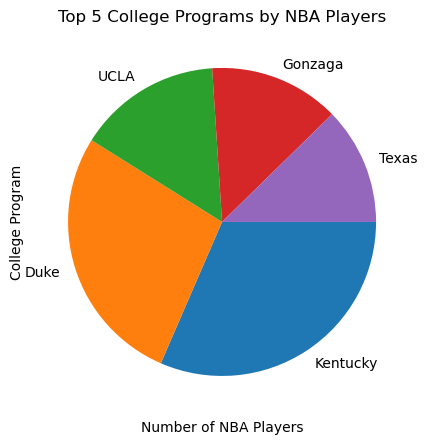

In [16]:
# What are the top 5 programs that players played before joining the NBA?
top5_programs = df['Prior_to_NBA'].value_counts().head(5)
top5_programs.plot(kind='pie', title='Top 5 College Programs by NBA Players', figsize=(8,5))
plt.xlabel('Number of NBA Players')
plt.ylabel('College Program')
plt.gca().invert_yaxis()
plt.show()


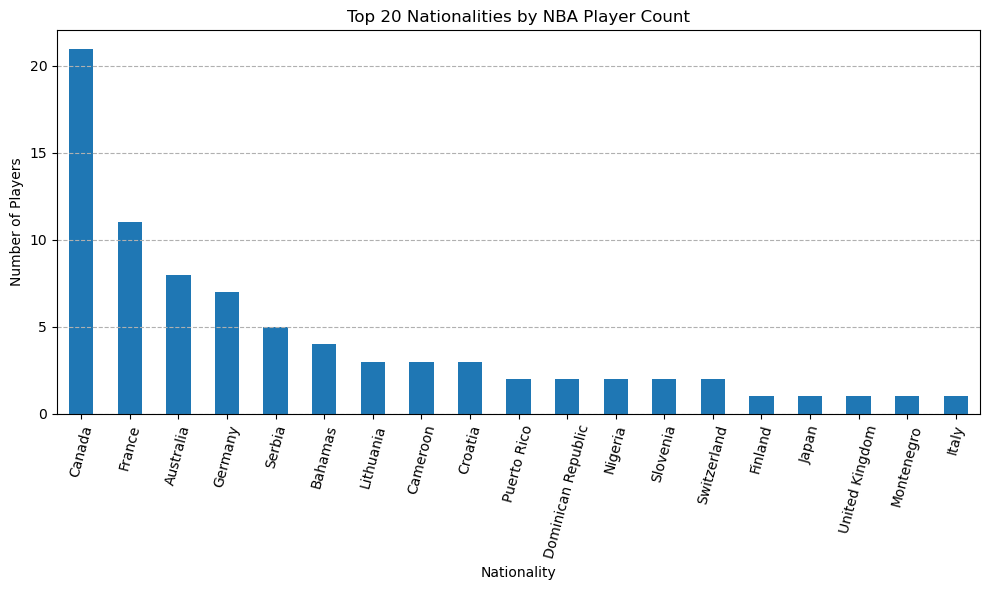

In [17]:
# What are the top 20 nationalities by NBA player count, besides the USA?
country_counts = df['Nationality'].value_counts().head(20)
country_counts = country_counts[country_counts.index != 'United States']
country_counts.plot(kind='bar', figsize=(10,6), title='Top 20 Nationalities by NBA Player Count')
plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.gca().set_yticks(range(0, 21, 5))
plt.ylabel('Number of Players')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

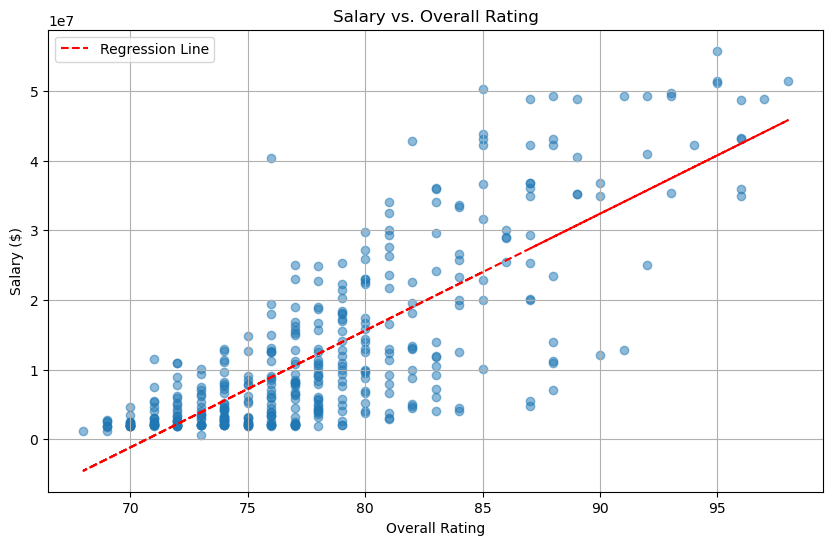

In [18]:
# Scatter plot of salary vs. overall rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall'], df['Salary'], alpha=0.5)
m = np.polyfit(df['Overall'], df['Salary'], 1)
b = np.polyval(m, df['Overall'])
plt.plot(df['Overall'], b, color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.title('Salary vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.show()

### Task 4.1 Find some best players with one highest rating among programs

In [19]:
# Who has the highest 3pt shot rating among Wisconsin alumni?
wisconsin_alumni = df[df['Prior_to_NBA'] == 'Wisconsin']
highest_3pt_shot = wisconsin_alumni.loc[wisconsin_alumni['3pt_Shot'].idxmax()]
highest_3pt_shot_name = highest_3pt_shot['Name']
highest_3pt_shot_name

'Johnny Davis'

In [20]:
# Who has the highest interior defense rating among Florida alumni?
florida_alumni = df[df['Prior_to_NBA'] == 'Florida']
highest_interior_defense = florida_alumni.loc[florida_alumni['Interior_Defense'].idxmax()]
highest_interior_defense_name = highest_interior_defense['Name']
highest_interior_defense_name

'Al Horford'

### Task 4.2 Plots

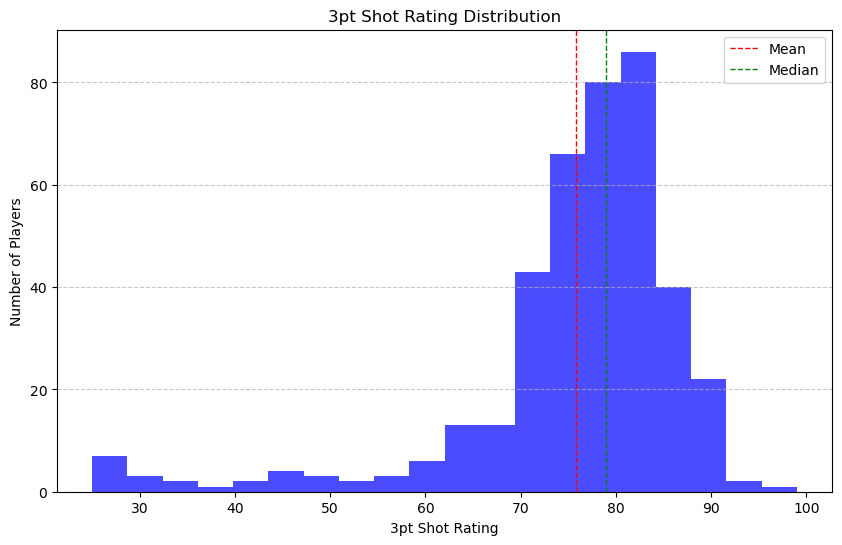

In [21]:
# What is the 3pt shot rating distribution?
plt.figure(figsize=(10, 6))
plt.hist(df['3pt_Shot'], bins=20, color='blue', alpha=0.7)
mean = df['3pt_Shot'].mean()
median = df['3pt_Shot'].median()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.title('3pt Shot Rating Distribution')
plt.xlabel('3pt Shot Rating')
plt.ylabel('Number of Players')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


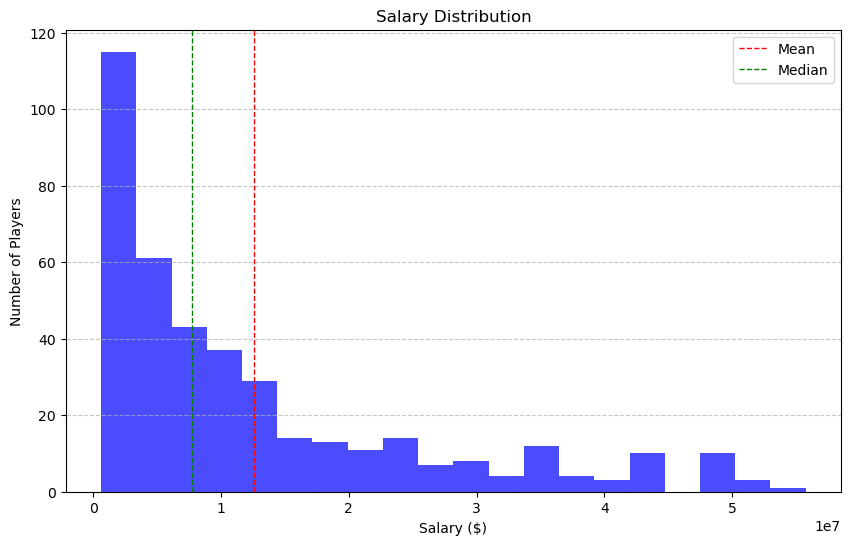

In [22]:
# what is the salary distribution?
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=20, color='blue', alpha=0.7)
mean = df['Salary'].mean()
median = df['Salary'].median()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.ylabel('Number of Players')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

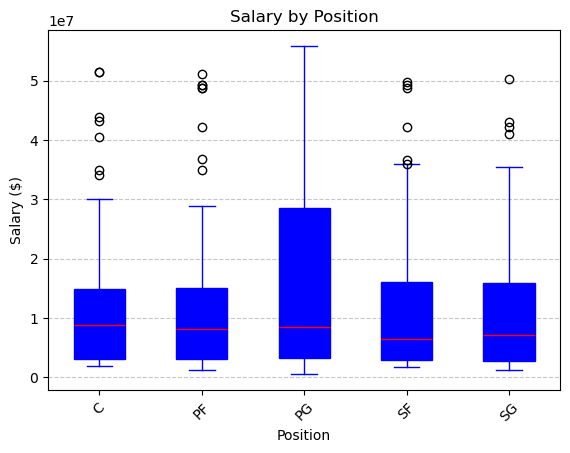

In [23]:
# plot the relationship between salary and position
plt.figure(figsize=(10, 6))
df['Position'] = df['Position'].astype('category')
df.boxplot(column='Salary', by='Position', grid=False, color='blue', patch_artist=True, medianprops=dict(color='red'))
plt.title('Salary by Position')
plt.suptitle('')
plt.xlabel('Position')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Task 5.1 Define simulator function

In real life, we can't directly measure a player's ability and convert it to numbers. The best tool we can use is his historical data like shooting percentage, but it is still hard to quantify. Since we are using simulated data from the video game NBA 2k25, we can take advantage of their rating data, but we still need to normalize it since the minimum of any rating is 25 and maximum is 99, they are not distributed evenly. 

Now we need to define the offensive functions. There are four types of offense and we group them into three: 2pt, 3pt, and close shot (layup or dunk). The function will read a specific player's information and look for correct offense type and grab the data. Since our players are smart and want to use the best way to score, they will choose to layup when that rating is higher, vise versa. Our function should be able to tell that. 

In [24]:
df.head()

,Name,Nationality,Team,Jersey,Position,Height_ft,Weight_lbs,Salary,Years_Played,Prior_to_NBA,Overall,Close_Shot,2pt_Shot,3pt_Shot,Layup,Driving_Dunk,Interior_Defense,Perimeter_Defense,Steal,Block
0,Aaron Gordon,United States,Denver Nuggets,32.0,PF,"6'8""",235,22841455.0,11.0,Arizona,85,84,70,79,86,94,80,86,38,47
1,Aaron Holiday,United States,Houston Rockets,0.0,PG,"6'0""",185,4668000.0,7.0,UCLA,74,95,74,82,70,60,34,68,46,35
2,Aaron Nesmith,United States,Indiana Pacers,23.0,SF,"6'5""",215,11000000.0,5.0,Vanderbilt Commodores,79,90,86,85,77,55,72,76,42,53
3,Aaron Wiggins,United States,Oklahoma City Thunder,21.0,PF,"6'5""",190,10514017.0,4.0,Maryland,79,78,68,88,80,70,48,59,56,56
7,A.J. Green,United States,Milwaukee Bucks,20.0,SG,"6'4""",190,2120693.0,3.0,Northern Iowa,77,60,80,89,71,40,40,63,49,40


In [25]:
## define a function to bucketize the ratings
def bucketize(rating):
   if rating >= 25 and rating <= 74:
      return 'G1'
   elif rating >= 75 and rating <= 79:
      return 'G2'
   elif rating >= 80 and rating <= 84:
      return 'G3'
   elif rating >= 85 and rating <= 89:
      return 'G4'
   elif rating >= 90 and rating <= 94:
      return 'G5'
   elif rating >= 95 and rating <= 98:
      return 'G6'
   elif rating == 99:
      return 'G7'

In [26]:
a = att.loc[att['Attribute'] == 'Layup'].loc[att['Height'] == "6'0", 'G7']
a

57    134.7
Name: G7, dtype: float64

### Task 5.2 Offensive functions (Close Shot, Two Point Shot, Three Point Shot)

In [27]:
def close_shot(player):
   # get players height_ft
   height = df.loc[df['Name'] == player, 'Height_ft'].values[0][:-1]
   # print(player,height)
   close_shot_score = bucketize(df.loc[df['Name'] == player, 'Close_Shot'].values[0])
   # print(close_shot_score)
   layup_score = bucketize(df.loc[df['Name'] == player, 'Layup'].values[0])
   driving_dunk_score = bucketize(df.loc[df['Name'] == player, 'Driving_Dunk'].values[0])
   # print(layup_score, driving_dunk_score)
   close_shot = att.loc[att['Attribute'] == 'Close Shot'].loc[att['Height'] == height, close_shot_score].values[0]
   # print(close_shot)
   layup = att.loc[att['Attribute'] == 'Layup'].loc[att['Height'] == height, layup_score].values[0]
   # print(layup)
   driving_dunk = att.loc[att['Attribute'] == 'Driving Dunk'].loc[att['Height'] == height, driving_dunk_score].values[0]
   if layup > driving_dunk:
      return close_shot + layup
   else:
      return close_shot + driving_dunk

In [28]:
def two_pt_shot(player):
   height = df.loc[df['Name'] == player, 'Height_ft'].values[0][:-1]
   two_pt_shot_score = bucketize(df.loc[df['Name'] == player, '2pt_Shot'].values[0])
   # print(player, height, two_pt_shot_score)
   two_pt_shot = att.loc[att['Attribute'] == 'Mid-Range Shot'].loc[att['Height'] == height, two_pt_shot_score].values[0]
   return two_pt_shot
   

In [29]:
def three_pt_shot(player):
   height = df.loc[df['Name'] == player, 'Height_ft'].values[0][:-1]
   three_pt_shot_score = bucketize(df.loc[df['Name'] == player, '3pt_Shot'].values[0])
   # print(player, height, three_pt_shot_score)
   three_pt_shot = att.loc[att['Attribute'] == 'Three-Point Shot'].loc[att['Height'] == height, three_pt_shot_score].values[0]
   return three_pt_shot


### Task 5.3 Defensive functions (Close Shot, Two Point Shot, Three Point Shot)

In [30]:
def close_defen(player):
   height = df.loc[df['Name'] == player, 'Height_ft'].values[0][:-1]
   # print(player, height)
   interior_defense_score = bucketize(df.loc[df['Name'] == player, 'Interior_Defense'].values[0])
   block_score = bucketize(df.loc[df['Name'] == player, 'Block'].values[0])
   # print(interior_defense_score, block_score)
   interior_defense = att.loc[att['Attribute'] == 'Interior Defense'].loc[att['Height'] == height, interior_defense_score].values[0]
   block = att.loc[att['Attribute'] == 'Block'].loc[att['Height'] == height, block_score].values[0]
   return interior_defense + block

In [31]:
def two_pt_defen(player):
   height = df.loc[df['Name'] == player, 'Height_ft'].values[0][:-1]
   perimeter_defen_score = bucketize(df.loc[df['Name'] == player, 'Perimeter_Defense'].values[0])
   interior_defen_score = bucketize(df.loc[df['Name'] == player, 'Interior_Defense'].values[0])
   # print(player, height, perimeter_defen_score, interior_defen_score)
   perimeter_defen = att.loc[att['Attribute'] == 'Perimeter Defense'].loc[att['Height'] == height, perimeter_defen_score].values[0]
   interior_defen = att.loc[att['Attribute'] == 'Interior Defense'].loc[att['Height'] == height, interior_defen_score].values[0]
   return perimeter_defen + interior_defen

In [32]:
def three_pt_defen(player):
   height = df.loc[df['Name'] == player, 'Height_ft'].values[0][:-1]
   perimeter_defen_score = bucketize(df.loc[df['Name'] == player, 'Perimeter_Defense'].values[0])
   steal_score = bucketize(df.loc[df['Name'] == player, 'Steal'].values[0])
   # print(player, height, perimeter_defen_score)
   perimeter_defen = att.loc[att['Attribute'] == 'Perimeter Defense'].loc[att['Height'] == height, perimeter_defen_score].values[0]
   steal = att.loc[att['Attribute'] == 'Steal'].loc[att['Height'] == height, steal_score].values[0]
   return perimeter_defen + steal

### Task 5.4 Final function

This function will take three inputs (offen_player, defen_player, shot_type). The function will use each player's info and shot type to calculate the score and check if the shot is made.

In [33]:
def shot_simulator(offen_player,defen_player,shot_type):
   if shot_type == 'Close Shot':
      offen = close_shot(offen_player)
      defen = close_defen(defen_player)
   elif shot_type == '2pt Shot':
      offen = two_pt_shot(offen_player)
      defen = two_pt_defen(defen_player)
   elif shot_type == '3pt Shot':
      offen = three_pt_shot(offen_player)
      defen = three_pt_defen(defen_player)
   else:
      return "Invalid shot type"
   
   if offen > defen:
      # print(offen,defen)
      return "Shot is made"
   else:
      # print(offen,defen)
      return "Shot is missed"
   

In [34]:
shot_simulator('Ja Morant','Victor Wembanyama','Close Shot')

'Shot is missed'

In [35]:
# a = [("Zion Williamson", "Anthony Davis", "Close Shot"),
# ("Ja Morant", "Brook Lopez", "Close Shot"),
# ("Giannis Antetokounmpo", "Joel Embiid", "Close Shot"),
# ("LeBron James", "Rudy Gobert", "Close Shot"),
# ("Russell Westbrook", "Draymond Green", "Close Shot"),
# ("Julius Randle", "Bam Adebayo", "Close Shot"),
# ("Jalen Brunson", "Mitchell Robinson", "Close Shot"),  # testing same team matchup
# ("Jimmy Butler", "Kristaps Porzingis", "Close Shot"),
# ("Anthony Edwards", "Jaren Jackson Jr.", "Close Shot"),
# ("DeMar DeRozan", "Victor Wembanyama", "Close Shot"),
# ("Kevin Durant", "Kawhi Leonard", "2pt Shot"),
# ("Chris Paul", "Marcus Smart", "2pt Shot"),
# ("Jayson Tatum", "OG Anunoby", "2pt Shot"),
# ("Devin Booker", "Jrue Holiday", "2pt Shot"),
# ("Bradley Beal", "Andrew Wiggins", "2pt Shot"),
# ("C.J. McCollum", "Matisse Thybulle", "2pt Shot"),
# ("Tyrese Haliburton", "Derrick White", "2pt Shot"),
# ("Khris Middleton", "Josh Hart", "2pt Shot"),
# ("Shai Gilgeous-Alexander", "Dillon Brooks", "2pt Shot"),
# ("LaMelo Ball", "Ben Simmons", "2pt Shot"),
# ("Stephen Curry", "Jrue Holiday", "3pt Shot"),
# ("Damian Lillard", "Mikal Bridges", "3pt Shot"),
# ("Klay Thompson", "Derrick White", "3pt Shot"),
# ("Luka Doncic", "Paul George", "3pt Shot"),
# ("Trae Young", "Luguentz Dort", "3pt Shot"),
# ("Desmond Bane", "Jaden McDaniels", "3pt Shot"),
# ("Jordan Poole", "Alex Caruso", "3pt Shot"),
# ("Buddy Hield", "Gary Payton II", "3pt Shot"),
# ("James Harden", "Anfernee Simons", "3pt Shot"),
# ("Tyler Herro", "Donte DiVincenzo", "3pt Shot")]
# for i in a:
#    print(i)
#    print(shot_simulator(i[0],i[1],i[2]))


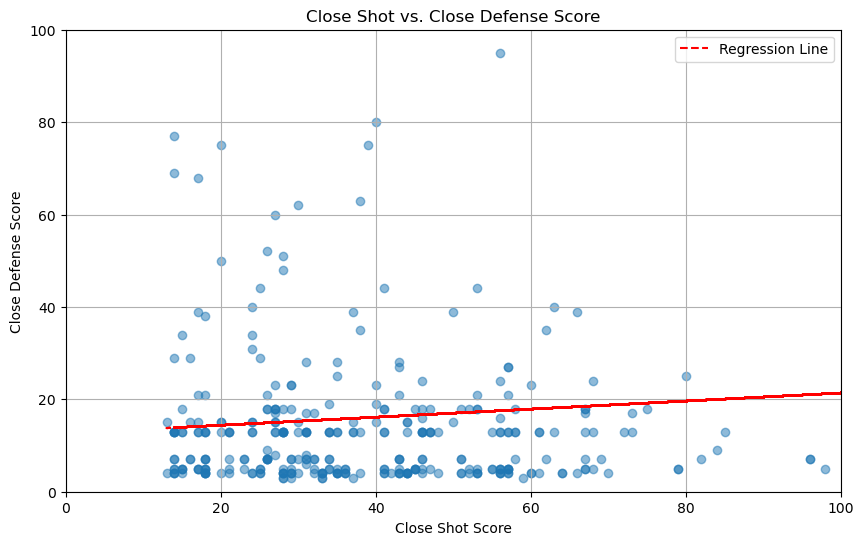

In [36]:
# plot the distribution of close shot and close defense score
close_shot_score = []
close_defen_score = []
for i in df['Name']:
   close_shot_score.append(close_shot(i))
   close_defen_score.append(close_defen(i))
df['Close_Shot_Score'] = close_shot_score
df['Close_Defen_Score'] = close_defen_score
df['Close_Shot_Score'] = df['Close_Shot_Score'].astype(int)
df['Close_Defen_Score'] = df['Close_Defen_Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.scatter(df['Close_Shot_Score'], df['Close_Defen_Score'], alpha=0.5)
m = np.polyfit(df['Close_Shot_Score'], df['Close_Defen_Score'], 1)
b = np.polyval(m, df['Close_Shot_Score'])
plt.plot(df['Close_Shot_Score'], b, color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Close Shot vs. Close Defense Score')
plt.xlabel('Close Shot Score')
plt.ylabel('Close Defense Score')
plt.grid(True)
plt.show()

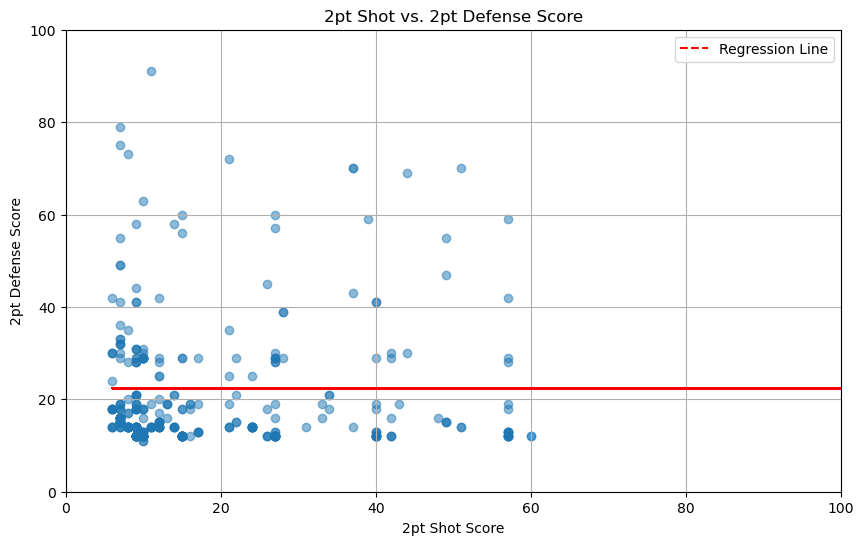

In [47]:
# plot the distribution of 2pt shot and 2pt defense score
two_pt_shot_score = []
two_pt_defen_score = []
for i in df['Name']:
   two_pt_shot_score.append(two_pt_shot(i))
   two_pt_defen_score.append(two_pt_defen(i))    
df['2pt_Shot_Score'] = two_pt_shot_score
df['2pt_Defen_Score'] = two_pt_defen_score
df['2pt_Shot_Score'] = df['2pt_Shot_Score'].astype(int)
df['2pt_Defen_Score'] = df['2pt_Defen_Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.scatter(df['2pt_Shot_Score'], df['2pt_Defen_Score'], alpha=0.5)
m = np.polyfit(df['2pt_Shot_Score'], df['2pt_Defen_Score'], 1)
b = np.polyval(m, df['2pt_Shot_Score'])
plt.plot(df['2pt_Shot_Score'], b, color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('2pt Shot vs. 2pt Defense Score')
plt.xlabel('2pt Shot Score')
plt.ylabel('2pt Defense Score')
plt.grid(True)
plt.show()

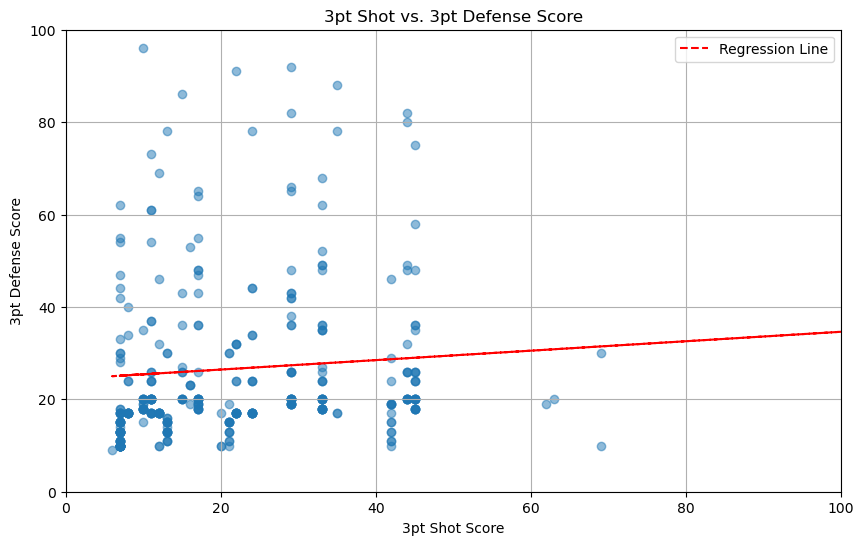

In [38]:
# plot the distribution of 3pt shot and 3pt defense score
three_pt_shot_score = []
three_pt_defen_score = []
for i in df['Name']:
   three_pt_shot_score.append(three_pt_shot(i))
   three_pt_defen_score.append(three_pt_defen(i))
df['3pt_Shot_Score'] = three_pt_shot_score
df['3pt_Defen_Score'] = three_pt_defen_score
df['3pt_Shot_Score'] = df['3pt_Shot_Score'].astype(int)
df['3pt_Defen_Score'] = df['3pt_Defen_Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.scatter(df['3pt_Shot_Score'], df['3pt_Defen_Score'], alpha=0.5)
m = np.polyfit(df['3pt_Shot_Score'], df['3pt_Defen_Score'], 1)
b = np.polyval(m, df['3pt_Shot_Score'])
plt.plot(df['3pt_Shot_Score'], b, color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('3pt Shot vs. 3pt Defense Score')
plt.xlabel('3pt Shot Score')
plt.ylabel('3pt Defense Score')
plt.grid(True)
plt.show()

### Task 6.1 Function extension

As I was designing this project in March and April, the NCAA March Madness and NBA playoffs were in full swing. Could I design some interesting little features? Which alumni from a program is the best when he plays against their rival, for certain shot type?

In [39]:
def rival_beater(program1, program2, shot_type):
   # loop the whole df and find all player that are from program1 and program2, strore them in two lists
   program1_players = df[df['Prior_to_NBA'] == program1]['Name'].tolist()
   program2_players = df[df['Prior_to_NBA'] == program2]['Name'].tolist()
   # print(program1_players, program2_players)
   highest_count = 0
   player_list = []
   for player1 in program1_players:
      count = 0
      for player2 in program2_players:
         # print(player1, player2)
         if shot_simulator(player1, player2, shot_type) == "Shot is made":
            count += 1
      # print(player1, count)      
      if highest_count == 0 or count >= highest_count:
         highest_count = count
         player_list.append([player1, highest_count])
   player_list = [player for player in player_list if player[1] == highest_count]
   print(player_list)
# save the backup_list to another irretable variable
def player_list(program1, program2, shot_type):
   program1_players = df[df['Prior_to_NBA'] == program1]['Name'].tolist()
   program2_players = df[df['Prior_to_NBA'] == program2]['Name'].tolist()
   backup_list = []
   for player1 in program1_players:
      count = 0
      for player2 in program2_players:
         if shot_simulator(player1, player2, shot_type) == "Shot is made":
            count += 1
      backup_list.append([player1, count])
   return backup_list


[['Chet Holmgren', 10], ['Corey Kispert', 10], ['Domantas Sabonis', 10], ['Kelly Olynyk', 10], ['Rui Hachimura', 10]]


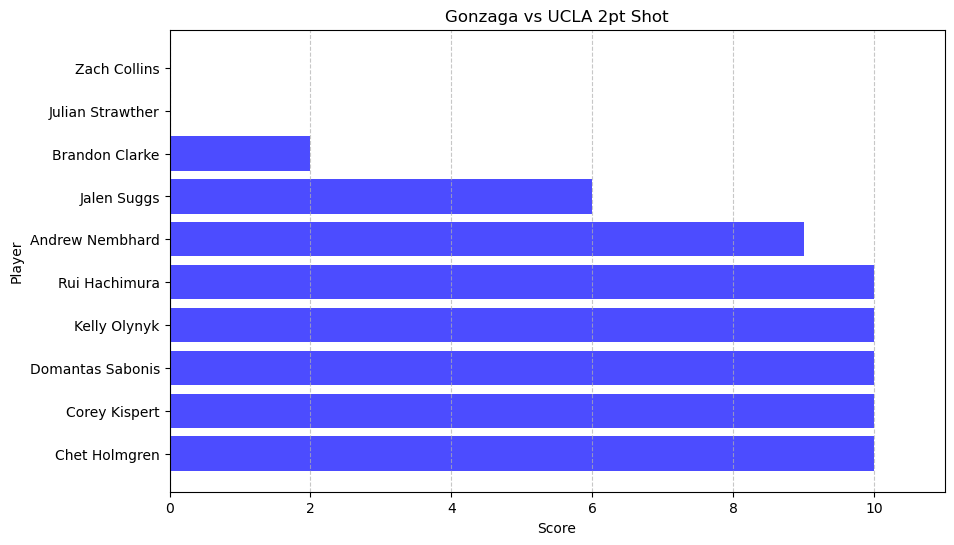

In [40]:
# Gonzaga vs UCLA 2pt Shot
rival_beater('Gonzaga','UCLA','2pt Shot')
ax = player_list('Gonzaga','UCLA','2pt Shot')
ax = pd.DataFrame(ax, columns=['Player', 'Score'])
ax = ax.sort_values(by='Score', ascending=False)
ax = ax.reset_index(drop=True)
ax['Score'] = ax['Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.barh(ax['Player'], ax['Score'], color='blue', alpha=0.7)
plt.xlim(0, 11)
plt.title('Gonzaga vs UCLA 2pt Shot')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

[['Zach LaVine', 10]]


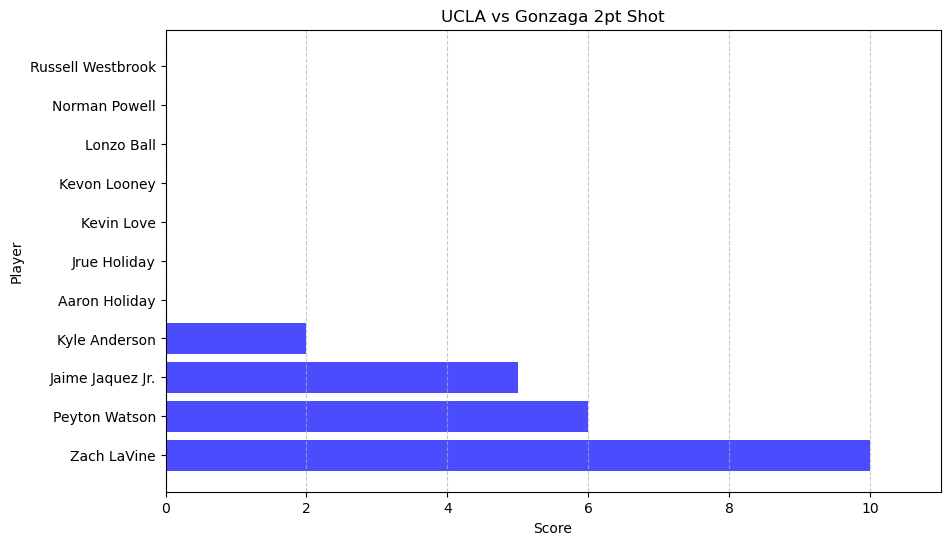

In [41]:
# UCLA vs Gonzaga 2pt Shot
rival_beater('UCLA','Gonzaga','2pt Shot')
ax = player_list('UCLA','Gonzaga','2pt Shot')
ax = pd.DataFrame(ax, columns=['Player', 'Score'])
ax = ax.sort_values(by='Score', ascending=False)
ax = ax.reset_index(drop=True)
ax['Score'] = ax['Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.barh(ax['Player'], ax['Score'], color='blue', alpha=0.7)
plt.xlim(0, 11)
plt.title('UCLA vs Gonzaga 2pt Shot')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


[['Devin Booker', 3], ['Karl-Anthony Towns', 3], ['Tyler Herro', 3]]


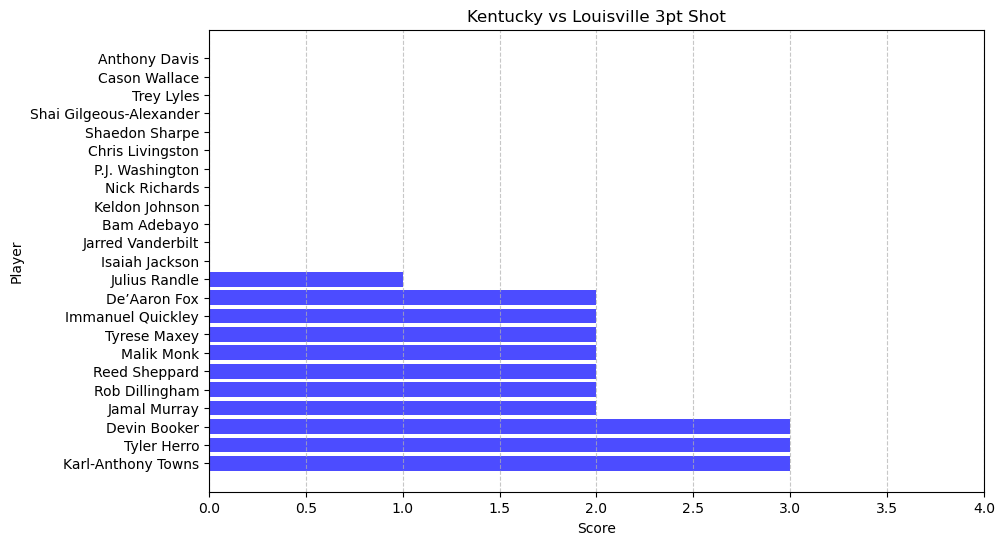

In [42]:
# Kentucky vs. Louisville 3pt Shot
rival_beater('Kentucky','Louisville','3pt Shot')
ax = player_list('Kentucky','Louisville','3pt Shot')
ax = pd.DataFrame(ax, columns=['Player', 'Score'])
ax = ax.sort_values(by='Score', ascending=False)
ax = ax.reset_index(drop=True)
ax['Score'] = ax['Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.barh(ax['Player'], ax['Score'], color='blue', alpha=0.7)
plt.xlim(0, 4)
plt.title('Kentucky vs Louisville 3pt Shot')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

[['Damion Lee', 19], ['Donovan Mitchell', 19]]


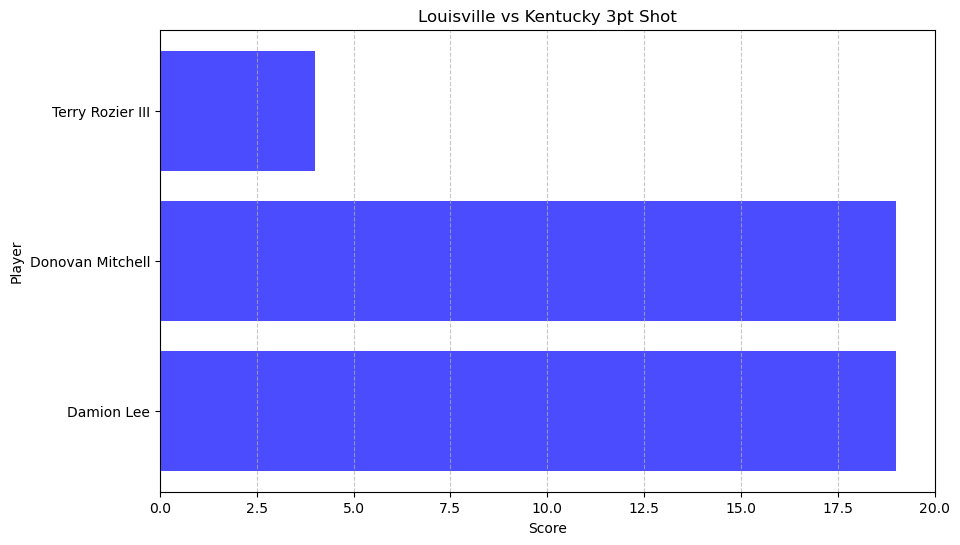

In [43]:
# Louisville vs. Kentucky 3pt Shot
rival_beater('Louisville','Kentucky','3pt Shot')
ax = player_list('Louisville','Kentucky','3pt Shot')
ax = pd.DataFrame(ax, columns=['Player', 'Score'])
ax = ax.sort_values(by='Score', ascending=False)
ax = ax.reset_index(drop=True)
ax['Score'] = ax['Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.barh(ax['Player'], ax['Score'], color='blue', alpha=0.7)
plt.xlim(0, 20)
plt.title('Louisville vs Kentucky 3pt Shot')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

[['Jalen Brunson', 4], ['Mikal Bridges', 4]]


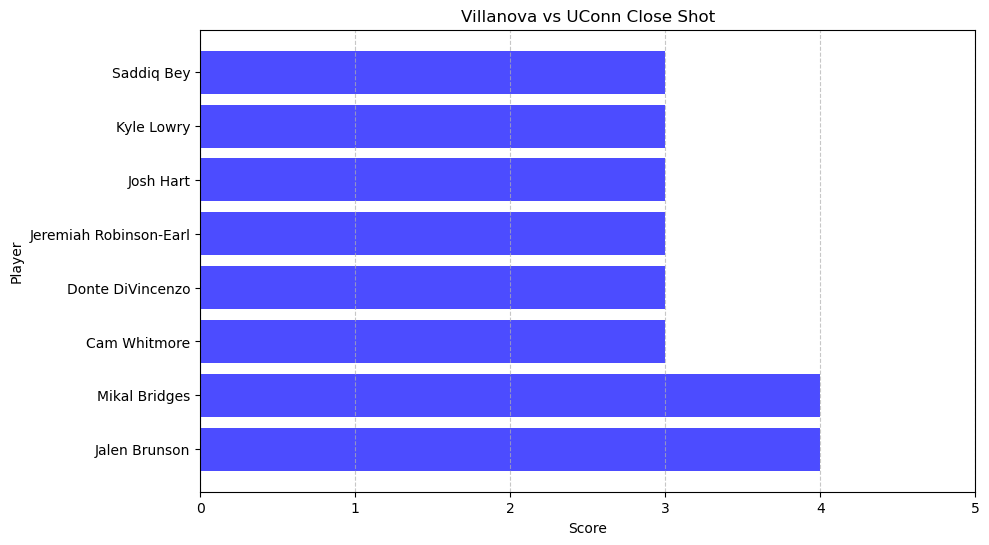

In [44]:
# Villanova vs. UConn close shot
rival_beater('Villanova','UConn','Close Shot')
ax = player_list('Villanova','UConn','Close Shot')
ax = pd.DataFrame(ax, columns=['Player', 'Score'])
ax = ax.sort_values(by='Score', ascending=False)
ax = ax.reset_index(drop=True)
ax['Score'] = ax['Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.barh(ax['Player'], ax['Score'], color='blue', alpha=0.7)
plt.xlim(0, 5)
plt.title('Villanova vs UConn Close Shot')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

[['Andre Jackson Jr.', 8], ['Donovan Clingan', 8], ['Jordan Hawkins', 8], ['Stephon Castle', 8]]


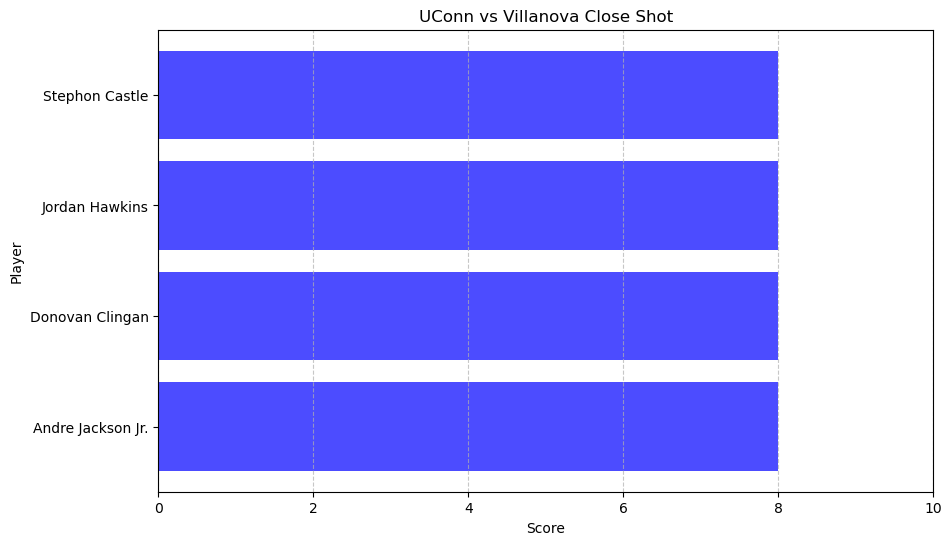

In [45]:
# UConn vs. Villanova close shot
rival_beater('UConn','Villanova','Close Shot')
ax = player_list('UConn','Villanova','Close Shot')
ax = pd.DataFrame(ax, columns=['Player', 'Score'])
ax = ax.sort_values(by='Score', ascending=False)
ax = ax.reset_index(drop=True)
ax['Score'] = ax['Score'].astype(int)
plt.figure(figsize=(10, 6))
plt.barh(ax['Player'], ax['Score'], color='blue', alpha=0.7)
plt.xlim(0, 10)
plt.title('UConn vs Villanova Close Shot')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()